# Understanding results for overall model

## Prepare results table

In [59]:
import pipeline as pp
import pandas as pd
import config

In [60]:
# Overall Model
r2016_1 = pd.read_csv("results/results_2016-RF,DT,LR.csv")
r2016_2 = pd.read_csv("results/results_2016-others.csv")
r2017_1 = pd.read_csv("results/results_2017-RF,DT,LR.csv")
r2017_2 = pd.read_csv("results/results_2017-others.csv")
r2018_1 = pd.read_csv("results/results_2018-RF,DT,LR.csv")
r2018_2 = pd.read_csv("results/results_2018-others.csv")

results = pd.DataFrame(columns=r2016_1.columns)
r = [r2016_1, r2017_1, r2018_1]
#r.extend([r2016_2, r2017_2, r2018_2])
for df in r:
    results = results.append(df)

results2016 = results[results['year']==2016]
results2017 = results[results['year']==2017]
results2018 = results[results['year']==2018]
print(len(results2016))
print(len(results2017))
print(len(results2018))  

104
104
104


In [61]:
# Male Model
male2016_1 = pd.read_csv("results/MALE_results_2016-RF,DT,LR.csv")
male2016_2 = pd.read_csv("results/MALE_results_2016-others.csv")
male2017_1 = pd.read_csv("results/MALE_results_2017-RF,DT,LR.csv")
male2017_2 = pd.read_csv("results/MALE_results_2017-others.csv")
male2018_1 = pd.read_csv("results/MALE_results_2018-RF,DT,LR.csv")
male2018_2 = pd.read_csv("results/MALE_results_2018-others.csv")

male = pd.DataFrame(columns=r2016_1.columns)
r = [male2016_1, male2017_1, male2018_1]
#r.extend([male2016_2, male2017_2, male2018_2])
for df in r:
    male = male.append(df)

male2016 = male[male['year']==2016]
male2017 = male[male['year']==2017]
male2018 = male[male['year']==2018]
print(len(male2016))
print(len(male2017))
print(len(male2018))

104
104
104


In [62]:
# Female Model
female2016_1 = pd.read_csv("results/FEMALE_results_2016-RF,DT,LR.csv")
female2017_1 = pd.read_csv("results/FEMALE_results_2017-RF,DT,LR.csv")
female2018_1 = pd.read_csv("results/FEMALE_results_2018-RF,DT,LR.csv")

female = pd.DataFrame(columns=r2016_1.columns)
r = [female2016_1, female2017_1, female2018_1]
#r.extend([female2016_2, female2017_2, female2018_2])
for df in r:
    female = female.append(df)

female2016 = female[female['year']==2016]
female2017 = female[female['year']==2017]
female2018 = female[female['year']==2018]
print(len(female2016))
print(len(female2017))
print(len(female2018))

104
104
104


## Get best model by train-test sets

In [63]:
time_col = config.TRAIN_TEST_COL
test_years = list(range(2016,2019))
cols = ['year', 'baseline', 'accuracy_20', 'recall_20', 'precision_20', 'f1_20', 'auc', 'classifiers','parameters']
metric = 'recall_20'

# Get highest recall by each of the train-test sets
print('overall model')
best_models = pp.get_best_models(results, time_col, test_years, cols, metric)
print()
print('male model')
best_male = pp.get_best_models(male, time_col, test_years, cols, metric)
print()
print('female model')
best_female = pp.get_best_models(female, time_col, test_years, cols, metric)
print()

overall model
For train-test set 2016, highest recall_20 attained is 0.8897418004187021
For train-test set 2017, highest recall_20 attained is 0.9910025706940874
For train-test set 2018, highest recall_20 attained is 0.9942129629629628

male model
For train-test set 2016, highest recall_20 attained is 0.9029126213592232
For train-test set 2017, highest recall_20 attained is 0.9955882352941176
For train-test set 2018, highest recall_20 attained is 0.9973082099596232

female model
For train-test set 2016, highest recall_20 attained is 0.9346733668341708
For train-test set 2017, highest recall_20 attained is 0.985
For train-test set 2018, highest recall_20 attained is 0.975206611570248



In [64]:
best_models

,year,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,classifiers,parameters
92,2016,0.091554,0.871390,0.889742,0.407348,0.558843,0.947099,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
92,2017,0.094994,0.893284,0.991003,0.470696,0.638245,0.966339,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
80,2018,0.047992,0.847414,0.994213,0.238545,0.384770,0.988099,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."


In [65]:
best_male

,year,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,classifiers,parameters
80,2016,0.090902,0.873281,0.902913,0.410445,0.564349,0.946443,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
92,2017,0.096331,0.895453,0.995588,0.479462,0.647228,0.967727,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
80,2018,0.048347,0.848061,0.997308,0.241054,0.388263,0.989418,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."


In [66]:
best_female

,year,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,classifiers,parameters
27,2016,0.094582,0.882129,0.934673,0.441805,0.600000,0.931818,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 10, 'criterion': 'entrop..."
11,2017,0.085763,0.883362,0.985000,0.422747,0.591592,0.970976,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 2, 'criterion': 'gini', ..."
12,2017,0.085763,0.883362,0.985000,0.422747,0.591592,0.970976,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 10, 'criterion': 'gini',..."
13,2017,0.085763,0.883362,0.985000,0.422747,0.591592,0.970976,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 50, 'criterion': 'gini',..."
23,2017,0.085763,0.883362,0.985000,0.422747,0.591592,0.971262,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 2, 'criterion': 'entropy..."
24,2017,0.085763,0.883362,0.985000,0.422747,0.591592,0.971262,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 10, 'criterion': 'entrop..."
25,2017,0.085763,0.883362,0.985000,0.422747,0.591592,0.971262,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 50, 'criterion': 'entrop..."
16,2018,0.045251,0.842932,0.975207,0.220561,0.359756,0.966987,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 50, 'criterion': 'gini',..."


#### Top-k best models

In [67]:
# Overall Models
metric = 'recall_20'
top_k = 10

topk2016 = pp.sort_models(results2016, metric, top_k, cols)
topk2017 = pp.sort_models(results2017, metric, top_k, cols)
topk2018 = pp.sort_models(results2018, metric, top_k, cols)

# Male Models
maletopk2016 = pp.sort_models(male2016, metric, top_k, cols)
maletopk2017 = pp.sort_models(male2017, metric, top_k, cols)
maletopk2018 = pp.sort_models(male2018, metric, top_k, cols)

# Female Models
femaletopk2016 = pp.sort_models(female2016, metric, top_k, cols)
femaletopk2017 = pp.sort_models(female2017, metric, top_k, cols)
femaletopk2018 = pp.sort_models(female2018, metric, top_k, cols)

In [68]:
topk2016

,year,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,classifiers,parameters
92,2016,0.091554,0.871390,0.889742,0.407348,0.558843,0.947099,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
80,2016,0.091554,0.870879,0.886950,0.406070,0.557090,0.947375,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
91,2016,0.091554,0.870496,0.884857,0.405112,0.555775,0.943905,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
78,2016,0.091554,0.869985,0.882066,0.403834,0.554021,0.936355,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
90,2016,0.091554,0.869729,0.880670,0.403195,0.553145,0.941800,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
79,2016,0.091554,0.869601,0.879972,0.402875,0.552707,0.936135,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
95,2016,0.091554,0.868324,0.872994,0.399681,0.548323,0.903663,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min..."
83,2016,0.091554,0.866535,0.863224,0.395208,0.542187,0.921631,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 20, 'min_sa..."
58,2016,0.091554,0.860912,0.832519,0.381150,0.522902,0.930838,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
59,2016,0.091554,0.860657,0.831124,0.380511,0.522025,0.931094,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."


In [69]:
topk2017

,year,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,classifiers,parameters
92,2017,0.094994,0.893284,0.991003,0.470696,0.638245,0.966339,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
80,2017,0.094994,0.891575,0.982005,0.466422,0.632450,0.966581,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
91,2017,0.094994,0.891087,0.979434,0.465201,0.630795,0.961054,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
90,2017,0.094994,0.890965,0.978792,0.464896,0.630381,0.960663,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
79,2017,0.094994,0.889011,0.968509,0.460012,0.623758,0.958229,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
78,2017,0.094994,0.888767,0.967224,0.459402,0.622930,0.957877,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
83,2017,0.094994,0.885348,0.949229,0.450855,0.611341,0.941282,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 20, 'min_sa..."
95,2017,0.094994,0.878999,0.915810,0.434982,0.589818,0.929212,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min..."
75,2017,0.094994,0.875092,0.895244,0.425214,0.576573,0.952494,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 5, 'min_sam..."
76,2017,0.094994,0.875092,0.895244,0.425214,0.576573,0.952494,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 5, 'min_sam..."


In [70]:
topk2018

,year,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,classifiers,parameters
80,2018,0.047992,0.847414,0.994213,0.238545,0.384770,0.988099,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
79,2018,0.047992,0.847303,0.993056,0.238267,0.384323,0.986788,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
78,2018,0.047992,0.846859,0.988426,0.237156,0.382531,0.984885,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
92,2018,0.047992,0.846637,0.986111,0.236601,0.381635,0.985596,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
91,2018,0.047992,0.846303,0.982639,0.235768,0.380291,0.983670,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
90,2018,0.047992,0.845970,0.979167,0.234935,0.378947,0.981792,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
83,2018,0.047992,0.845081,0.969907,0.232713,0.375364,0.974815,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 20, 'min_sa..."
56,2018,0.047992,0.843526,0.953704,0.228825,0.369093,0.963519,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
59,2018,0.047992,0.843415,0.952546,0.228548,0.368645,0.962997,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
62,2018,0.047992,0.843415,0.952546,0.228548,0.368645,0.961420,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."


In [71]:
maletopk2016

,year,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,classifiers,parameters
80,2016,0.090902,0.873281,0.902913,0.410445,0.564349,0.946443,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
79,2016,0.090902,0.872251,0.897249,0.407871,0.560809,0.941737,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
78,2016,0.090902,0.870045,0.885113,0.402354,0.553224,0.934824,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
92,2016,0.090902,0.867103,0.868932,0.394998,0.543110,0.941922,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
91,2016,0.090902,0.866662,0.866505,0.393895,0.541593,0.938538,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
95,2016,0.090902,0.865044,0.857605,0.389849,0.536030,0.891411,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min..."
90,2016,0.090902,0.864750,0.855987,0.389114,0.535019,0.931421,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
83,2016,0.090902,0.864161,0.852751,0.387643,0.532996,0.918772,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 20, 'min_sa..."
56,2016,0.090902,0.858278,0.820388,0.372931,0.512769,0.927529,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
62,2016,0.090902,0.857836,0.817961,0.371828,0.511252,0.926069,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."


In [72]:
maletopk2017

,year,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,classifiers,parameters
92,2017,0.096331,0.895453,0.995588,0.479462,0.647228,0.967727,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
80,2017,0.096331,0.895028,0.993382,0.478399,0.645793,0.966106,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
90,2017,0.096331,0.894603,0.991176,0.477337,0.644359,0.965995,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
91,2017,0.096331,0.894319,0.989706,0.476629,0.643403,0.965076,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
79,2017,0.096331,0.892619,0.980882,0.472380,0.637667,0.959581,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
78,2017,0.096331,0.892478,0.980147,0.472025,0.637189,0.959297,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
83,2017,0.096331,0.883695,0.934559,0.450071,0.607553,0.934672,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 20, 'min_sa..."
95,2017,0.096331,0.877745,0.903676,0.435198,0.587476,0.920190,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 20, 'min..."
75,2017,0.096331,0.874628,0.887500,0.427408,0.576960,0.949081,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 5, 'min_sam..."
77,2017,0.096331,0.874628,0.887500,0.427408,0.576960,0.949081,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 5, 'min_sam..."


In [73]:
maletopk2018

,year,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,classifiers,parameters
80,2018,0.048347,0.848061,0.997308,0.241054,0.388263,0.989418,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
78,2018,0.048347,0.847931,0.995962,0.240729,0.387739,0.988592,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
79,2018,0.048347,0.847931,0.995962,0.240729,0.387739,0.988389,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
92,2018,0.048347,0.846369,0.979812,0.236825,0.381451,0.979970,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
91,2018,0.048347,0.846369,0.979812,0.236825,0.381451,0.979833,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
90,2018,0.048347,0.845979,0.975774,0.235849,0.379879,0.977824,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 10, 'min..."
56,2018,0.048347,0.844807,0.963661,0.232921,0.375164,0.964530,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
59,2018,0.048347,0.844547,0.960969,0.232271,0.374116,0.963776,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
61,2018,0.048347,0.844287,0.958277,0.231620,0.373068,0.960307,"RandomForestClassifier(bootstrap=True, class_w...","{'max_depth': 20, 'max_features': 'sqrt', 'min..."
83,2018,0.048347,0.844027,0.955585,0.230969,0.372020,0.960421,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 20, 'min_sa..."


In [74]:
femaletopk2016

,year,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,classifiers,parameters
27,2016,0.094582,0.882129,0.934673,0.441805,0.600000,0.931818,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 10, 'criterion': 'entrop..."
16,2016,0.094582,0.881179,0.929648,0.439430,0.596774,0.952513,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 50, 'criterion': 'gini',..."
26,2016,0.094582,0.881179,0.929648,0.439430,0.596774,0.927749,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 2, 'criterion': 'entropy..."
28,2016,0.094582,0.880228,0.924623,0.437055,0.593548,0.939871,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 50, 'criterion': 'entrop..."
19,2016,0.094582,0.877376,0.909548,0.429929,0.583871,0.936558,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 50, 'criterion': 'gini',..."
15,2016,0.094582,0.875475,0.899497,0.425178,0.577419,0.935432,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 10, 'criterion': 'gini',..."
24,2016,0.094582,0.874525,0.894472,0.422803,0.574194,0.948708,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 10, 'criterion': 'entrop..."
23,2016,0.094582,0.874525,0.894472,0.422803,0.574194,0.948708,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 2, 'criterion': 'entropy..."
25,2016,0.094582,0.874525,0.894472,0.422803,0.574194,0.948708,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 50, 'criterion': 'entrop..."
13,2016,0.094582,0.872624,0.884422,0.418052,0.567742,0.948277,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 50, 'criterion': 'gini',..."


In [75]:
femaletopk2017

,year,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,classifiers,parameters
11,2017,0.085763,0.883362,0.985,0.422747,0.591592,0.970976,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 2, 'criterion': 'gini', ..."
25,2017,0.085763,0.883362,0.985,0.422747,0.591592,0.971262,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 50, 'criterion': 'entrop..."
24,2017,0.085763,0.883362,0.985,0.422747,0.591592,0.971262,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 10, 'criterion': 'entrop..."
23,2017,0.085763,0.883362,0.985,0.422747,0.591592,0.971262,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 2, 'criterion': 'entropy..."
13,2017,0.085763,0.883362,0.985,0.422747,0.591592,0.970976,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 50, 'criterion': 'gini',..."
12,2017,0.085763,0.883362,0.985,0.422747,0.591592,0.970976,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 10, 'criterion': 'gini',..."
16,2017,0.085763,0.876501,0.945,0.405579,0.567568,0.953841,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 50, 'criterion': 'gini',..."
15,2017,0.085763,0.873070,0.925,0.396996,0.555556,0.941522,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 10, 'criterion': 'gini',..."
90,2017,0.085763,0.873070,0.925,0.396996,0.555556,0.962763,"RandomForestClassifier(bootstrap=True, class_w...","{'max_features': 'sqrt', 'random_state': 0, 'm..."
28,2017,0.085763,0.872213,0.920,0.394850,0.552553,0.933708,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 50, 'criterion': 'entrop..."


In [76]:
femaletopk2018

,year,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,classifiers,parameters
16,2018,0.045251,0.842932,0.975207,0.220561,0.359756,0.966987,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 50, 'criterion': 'gini',..."
11,2018,0.045251,0.842184,0.966942,0.218692,0.356707,0.976076,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 2, 'criterion': 'gini', ..."
12,2018,0.045251,0.842184,0.966942,0.218692,0.356707,0.976076,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 10, 'criterion': 'gini',..."
24,2018,0.045251,0.842184,0.966942,0.218692,0.356707,0.976726,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 10, 'criterion': 'entrop..."
25,2018,0.045251,0.842184,0.966942,0.218692,0.356707,0.976726,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 50, 'criterion': 'entrop..."
13,2018,0.045251,0.842184,0.966942,0.218692,0.356707,0.976076,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 50, 'criterion': 'gini',..."
23,2018,0.045251,0.842184,0.966942,0.218692,0.356707,0.976726,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 2, 'criterion': 'entropy..."
91,2018,0.045251,0.839940,0.942149,0.213084,0.347561,0.961096,"RandomForestClassifier(bootstrap=True, class_w...","{'max_features': 'sqrt', 'random_state': 0, 'm..."
80,2018,0.045251,0.839192,0.933884,0.211215,0.344512,0.949788,"RandomForestClassifier(bootstrap=True, class_w...","{'max_features': 'log2', 'random_state': 0, 'm..."
19,2018,0.045251,0.839192,0.933884,0.211215,0.344512,0.946582,"DecisionTreeClassifier(class_weight=None, crit...","{'min_samples_split': 50, 'criterion': 'gini',..."


## Get Stability Score

In [77]:
# Overall Model
pp.get_stability_score([results2016,results2017,results2018], metric, cols)

,,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,rank
classifiers,parameters,,,,,,,
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}",0.07818,0.869956,0.954390,0.370346,0.524770,0.967352,0.666667
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}",0.07818,0.870437,0.955618,0.371548,0.526241,0.966345,1.000000
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=10,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'random_state': 0}",0.07818,0.869295,0.948977,0.368694,0.522287,0.962876,2.666667
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'random_state': 0}",0.07818,0.868537,0.945905,0.366797,0.519828,0.959706,3.333333
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=10,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10, 'random_state': 0}",0.07818,0.868639,0.947179,0.367052,0.520262,0.960384,3.333333
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'random_state': 0}",0.07818,0.868888,0.946209,0.367675,0.520824,0.961418,4.000000
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 50, 'random_state': 0}",0.07818,0.865655,0.927453,0.359592,0.509631,0.945910,6.333333
"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=20, max_features='sqrt', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=10,\n min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,\n oob_score=False, random_state=0, verbose=0, warm_start=False)","{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}",0.07818,0.858826,0.888258,0.342519,0.486046,0.946864,9.333333
"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=20, max_features='sqrt', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n 

In [78]:
# Male Models
pp.get_stability_score([male2016,male2017,male2018], metric, cols)

,,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,rank
classifiers,parameters,,,,,,,
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}",0.078527,0.872123,0.964534,0.376633,0.532802,0.967322,0.333333
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}",0.078527,0.869642,0.948111,0.370428,0.523930,0.963206,2.000000
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=10,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10, 'random_state': 0}",0.078527,0.870934,0.958031,0.373660,0.528738,0.963236,2.333333
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'random_state': 0}",0.078527,0.870151,0.953741,0.371703,0.526051,0.960904,2.666667
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=10,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'random_state': 0}",0.078527,0.869117,0.945341,0.369116,0.522149,0.961149,3.666667
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'random_state': 0}",0.078527,0.868444,0.940979,0.367433,0.519753,0.958413,4.333333
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 50, 'random_state': 0}",0.078527,0.863961,0.914298,0.356228,0.504190,0.937955,7.333333
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 50, 'random_state': 0}",0.078527,0.860450,0.886780,0.347451,0.491173,0.913168,8.333333
"RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n max_depth=20, max_features='sqrt', max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,\n oob_score=False, random_s

In [79]:
# Female Models
pp.get_stability_score([female2016,female2017,female2018], metric, cols)

,,baseline,accuracy_20,recall_20,precision_20,f1_20,auc,rank
classifiers,parameters,,,,,,,
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'min_samples_split': 50, 'criterion': 'gini', 'random_state': 0, 'max_depth': 10}",0.075199,0.866871,0.949952,0.355190,0.508033,0.957781,2.333333
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=10,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'min_samples_split': 10, 'criterion': 'entropy', 'random_state': 0, 'max_depth': 5}",0.075199,0.866690,0.948805,0.354747,0.507497,0.965565,3.666667
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'min_samples_split': 2, 'criterion': 'gini', 'random_state': 0, 'max_depth': 5}",0.075199,0.866056,0.945455,0.353164,0.505347,0.965109,3.666667
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'min_samples_split': 50, 'criterion': 'entropy', 'random_state': 0, 'max_depth': 5}",0.075199,0.866690,0.948805,0.354747,0.507497,0.965565,4.333333
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'min_samples_split': 2, 'criterion': 'entropy', 'random_state': 0, 'max_depth': 5}",0.075199,0.866690,0.948805,0.354747,0.507497,0.965565,5.333333
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'min_samples_split': 50, 'criterion': 'gini', 'random_state': 0, 'max_depth': 5}",0.075199,0.866056,0.945455,0.353164,0.505347,0.965109,6.000000
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=10,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'min_samples_split': 10, 'criterion': 'gini', 'random_state': 0, 'max_depth': 5}",0.075199,0.866056,0.945455,0.353164,0.505347,0.965109,6.000000
"DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'min_samples_split': 50, 'criterion': 'entropy', 'random_state': 0, 'max_depth': 10}",0.075199,0.863628,0.923414,0.347083,0.495855,0.942176,8.000000
"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=50,\n min_weight_fraction_leaf=0.0, presort=False, random_state=0,\n splitter='best')","{'min_samples_split': 50, 'criteri

## Plot Metric Graph over traintest sets

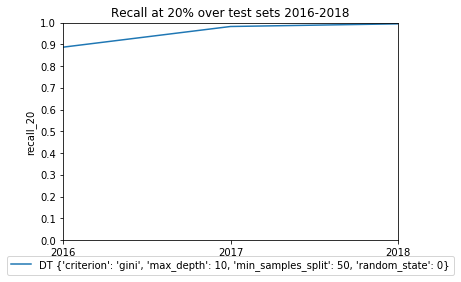

In [80]:
# To be edited to the graphs we want 

metric='recall_20'
model_and_para1 = [('DT', "{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 50, 'random_state': 0}")
#                  ('GB', "{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}"),
#                  ('GB', "{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 10, 'random_state': 0, 'subsample': 0.5}"),
#                  ('GB', "{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.5}")
                 ]
# ADD MORE PLOTS HERE
# female models have different string parameters
model_and_para2 = [('DT', "{'min_samples_split': 50, 'criterion': 'gini', 'random_state': 0, 'max_depth': 10}")]

baseline= None #[0.091554, 0.094994, 0.047992]
title='Recall at 20% over test sets 2016-2018'
filename='recall_test2016-2018'
pp.get_metric_graph(results, metric, model_and_para1, baseline, time_col, test_years, title, filename, save=False)

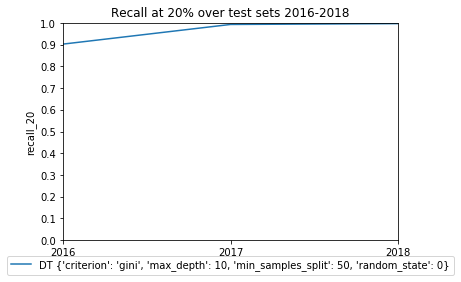

In [81]:
pp.get_metric_graph(male, metric, model_and_para1, baseline, time_col, test_years, title, filename, save=False)

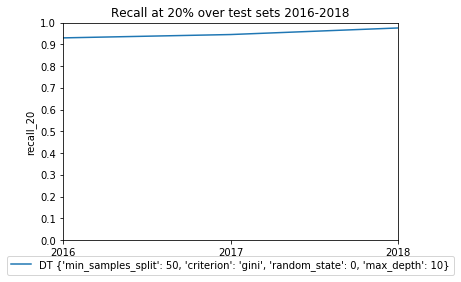

In [82]:
pp.get_metric_graph(female, metric, model_and_para2, baseline, time_col, test_years, title, filename, save=False)